In [1]:
"""Example showing the optimization and evolution of surrogates"""

# Copyright (c) 2024 Alliance for Sustainable Energy, LLC

# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.

# You should have received a copy of the GNU General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.

__authors__ = ["Weslley S. Pereira"]
__contact__ = "weslley.dasilvapereira@nrel.gov"
__maintainer__ = "Weslley S. Pereira"
__email__ = "weslley.dasilvapereira@nrel.gov"
__credits__ = ["Weslley S. Pereira"]
__version__ = "0.4.2"
__deprecated__ = False

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_2d(x, y, FX, bounds, label):
    fig, ax = plt.subplots()
    im = ax.imshow(FX, cmap="jet", extent=[bounds[0][0],bounds[0][1],bounds[1][1],bounds[1][0]])
    fig.colorbar(im, ax=ax, label=label)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.scatter(x[0:len(x)-1],y[0:len(x)-1],c='gray',marker='x')
    ax.scatter(x[-1],y[-1],c='w',marker='x')
    return fig, ax

In [3]:
def ackley(x, n: int = 2):
    from math import exp, sqrt, pi

    a = 20
    b = 0.2
    c = 2*pi
    return (
        -a * exp(-b * sqrt(np.dot(x, x) / n))
        - exp(np.sum(np.cos(c * np.asarray(x))) / n)
        + a
        + exp(1)
    )


def eggholder(x):
    return -(x[1]+47)*np.sin(np.sqrt(abs(x[1]+0.5*x[0]+47)))-x[0]*np.sin(np.sqrt(abs(x[0]-(x[1]+47))))

objf = {}
# Breaks the symmetry of the problem
objf["ackley"] = lambda x: ackley([xi - 3.14 for xi in x], n=2)
objf["eggholder"] = eggholder

refbounds = {}
refbounds["ackley"] = [-32.768, 32.768]
refbounds["eggholder"] = [-512, 512]

In [4]:
# Define dimensions and bounds
n = 2
funcstr = "eggholder"
bounds = [refbounds[funcstr]] * n

In [5]:
# Compute the mean and standard deviation of the GP
nx = 100
ny = 100
x = np.linspace(bounds[0][0], bounds[0][1], nx)
y = np.linspace(bounds[1][0], bounds[1][1], ny)
XY = np.array([[[x[j], y[i]] for j in range(nx)] for i in range(ny)])

/Users/wdasilv/repositories/black-box-opt/.venv/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Best value of  -441.50075089951764  at  [-256.  256.]
Last samples at  [ 256. -256.]
Best value of  -441.50075089951764  at  [-256.  256.]
Last samples at  [-214.8084474   412.51935667]
Best value of  -441.50075089951764  at  [-256.  256.]
Last samples at  [ 345.34282398 -427.19047113]
Best value of  -441.50075089951764  at  [-256.  256.]
Last samples at  [-262.74749865  258.77725455]
Best value of  -441.50075089951764  at  [-256.  256.]
Last samples at  [-266.16299898  199.54339073]
Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [-247.5629205   275.87553024]
Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [-196.40933051  280.20710885]
Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [-316.37203251  309.38015404]
Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [-247.38191156  295.950619  ]


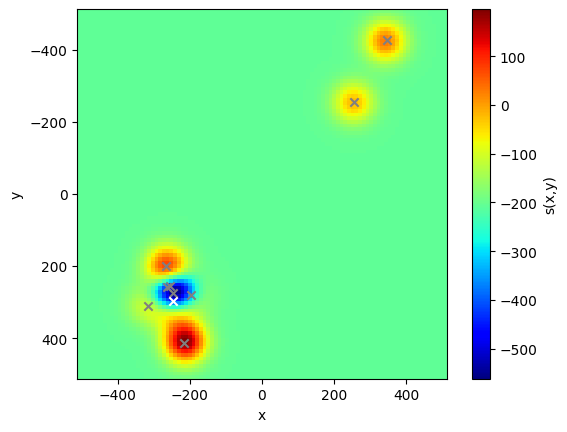

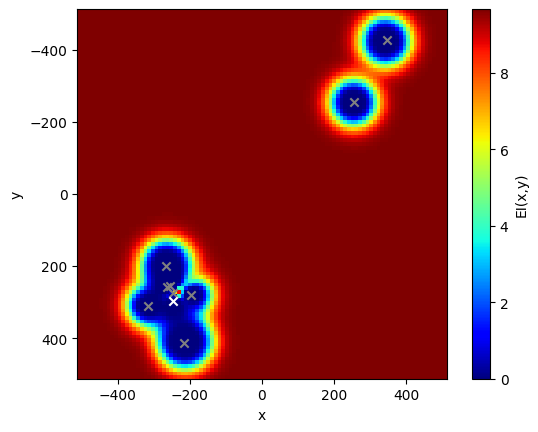

Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [-84.10933862 -95.58448642]
Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [-245.13702014 -391.1718211 ]
Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [-507.79643221  -89.69043965]
Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [143.47069093 287.50089992]
Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [106.74833525 308.91257596]
Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [122.52639007 249.51249396]
Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [159.75567095 318.34677177]
Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [186.97066957 282.56999101]
Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at

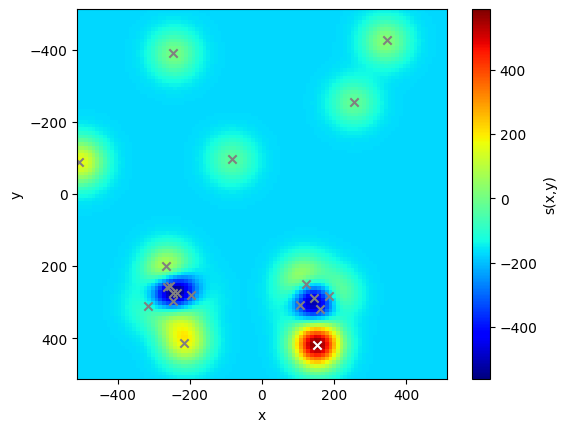

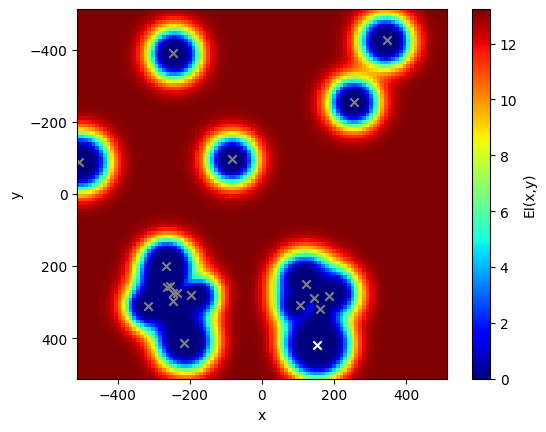

Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [510.82721116  63.59431671]
Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [497.07609238 106.51732164]
Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [512.          30.49684243]
Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [468.46941712  33.34420317]
Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [503.19661721 486.29853894]
Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [  40.48718534 -484.36345325]
Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [-511.54258624  488.61623937]
Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [-508.19447875 -509.62741541]
Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples 

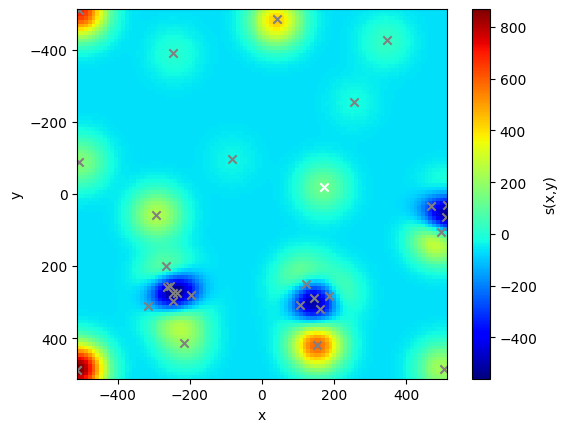

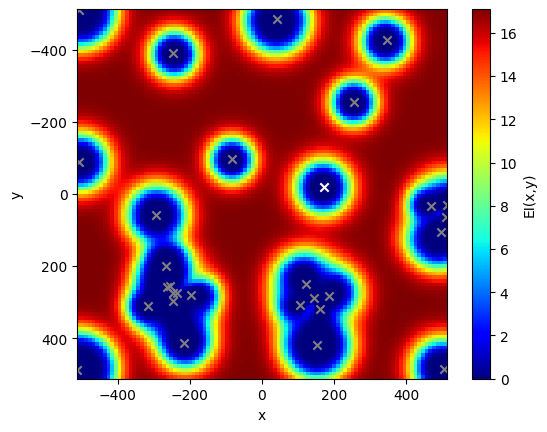

Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [-510.94847825  185.5693408 ]
Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [ 507.04061087 -248.63467848]
Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [ 512.       -315.461104]
Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [ 445.05525636 -274.87068102]
Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [ 512.         -172.13439676]
Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [ 512.         -413.43279088]
Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [ 407.80490861 -159.89305269]
Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [-57.29429693  99.20705083]
Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samp

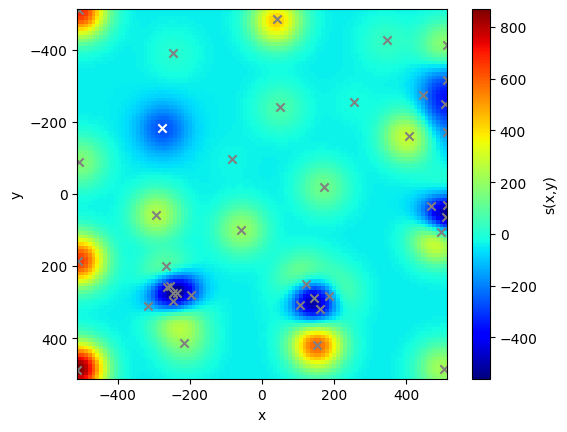

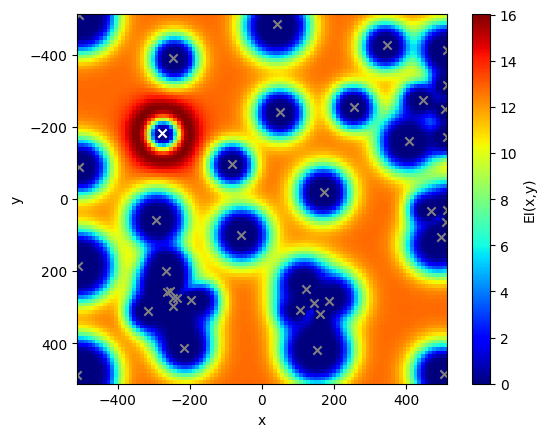

Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [-340.32764969 -220.87729808]
Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [-219.4283875  -141.10637087]
Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [-224.90931056 -233.02286061]
Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [-312.45689624  311.42873418]
Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [-310.66931699 -108.61073586]
Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [-121.32036808 -273.7711678 ]
Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [ -96.22137052 -339.07566713]
Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [-120.06050339 -208.78880479]
Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Las

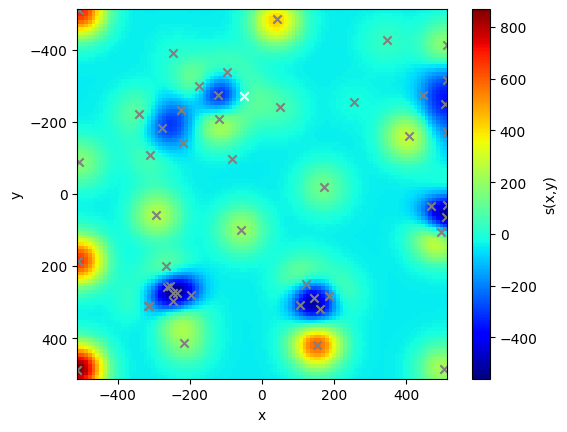

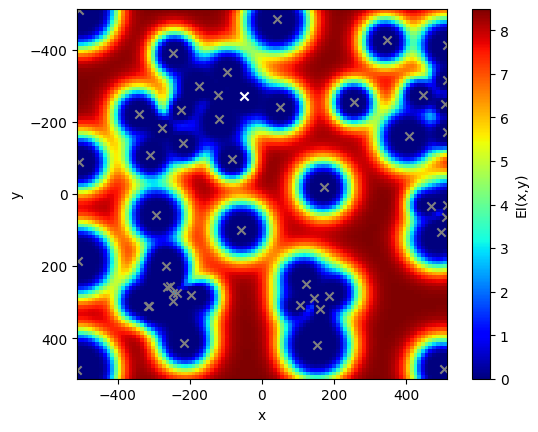

Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [398.26853876 301.60034318]
Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [-510.33973799 -302.07537013]
Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [-450.82189309 -337.96727485]
Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [-490.52827593 -234.25820949]
Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [-451.34330081 -259.21910147]
Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [-261.92969504  259.43366476]
Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [-512.         -198.43097024]
Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [-490.97087422 -378.38956186]
Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last 

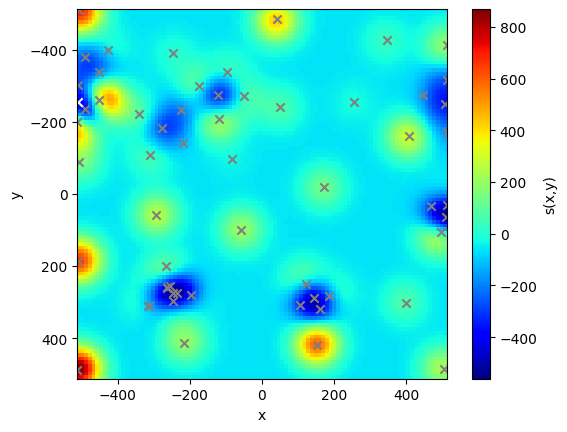

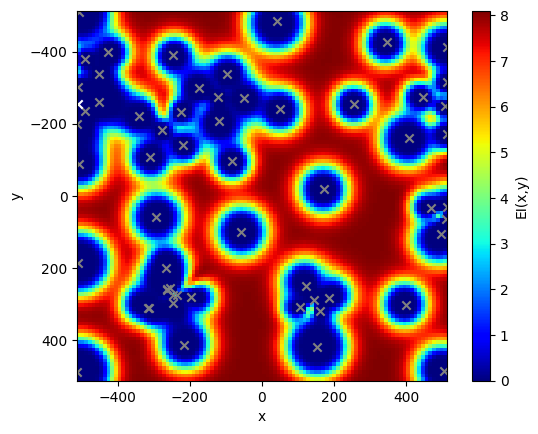

Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [-39.42133907 511.16551857]
Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [352.98275175  25.66841974]
Best value of  -557.6034452978303  at  [-247.5629205   275.87553024]
Last samples at  [-34.53524097 321.57261498]
Best value of  -643.2085808732518  at  [320.92698409 512.        ]
Last samples at  [320.92698409 512.        ]
Best value of  -826.3759170385327  at  [326.72546913 486.83536381]
Last samples at  [326.72546913 486.83536381]
Best value of  -826.3759170385327  at  [326.72546913 486.83536381]
Last samples at  [348.06876446 483.37055524]
Best value of  -826.3759170385327  at  [326.72546913 486.83536381]
Last samples at  [333.42781733 464.69873779]
Best value of  -826.3759170385327  at  [326.72546913 486.83536381]
Last samples at  [370.18986926 510.41116747]
Best value of  -888.6599501905408  at  [346.89252379 498.2673563 ]
Last samples at  [346.89252379 

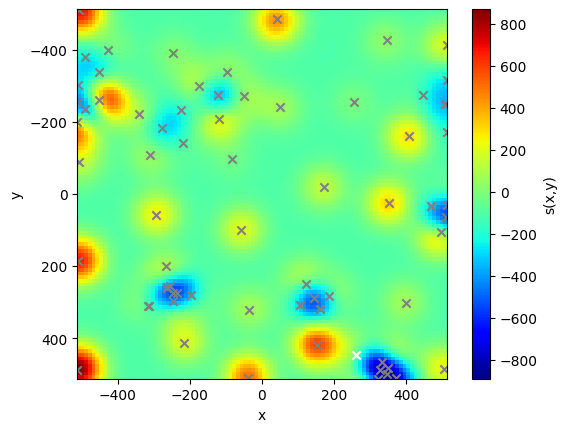

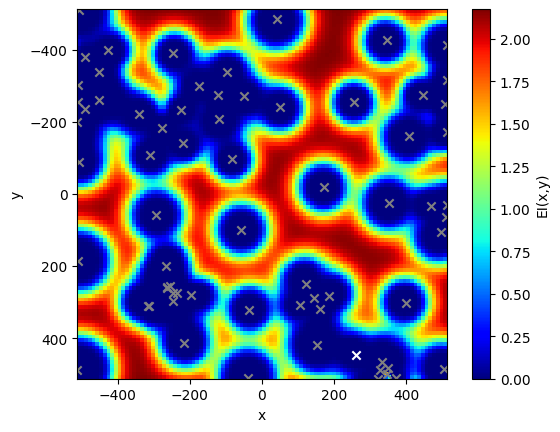

Best value of  -888.6599501905408  at  [346.89252379 498.2673563 ]
Last samples at  [-143.40054644 -512.        ]


/Users/wdasilv/repositories/black-box-opt/.venv/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Best value of  -888.6599501905408  at  [346.89252379 498.2673563 ]
Last samples at  [-194.63599112 -501.38866348]
Best value of  -888.6599501905408  at  [346.89252379 498.2673563 ]
Last samples at  [-156.13570029 -460.08703735]
Best value of  -888.6599501905408  at  [346.89252379 498.2673563 ]
Last samples at  [-259.70832006 -512.        ]
Best value of  -888.6599501905408  at  [346.89252379 498.2673563 ]
Last samples at  [ 183.65539911 -388.46525859]
Best value of  -888.6599501905408  at  [346.89252379 498.2673563 ]
Last samples at  [-337.05669483  512.        ]


/Users/wdasilv/repositories/black-box-opt/.venv/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Best value of  -888.6599501905408  at  [346.89252379 498.2673563 ]
Last samples at  [-347.45517151  478.38484888]
Best value of  -888.6599501905408  at  [346.89252379 498.2673563 ]
Last samples at  [ -83.72697364 -502.92938167]
Best value of  -888.6599501905408  at  [346.89252379 498.2673563 ]
Last samples at  [-300.24384501  501.53138128]
Best value of  -888.6599501905408  at  [346.89252379 498.2673563 ]
Last samples at  [-216.4685751   509.26884242]


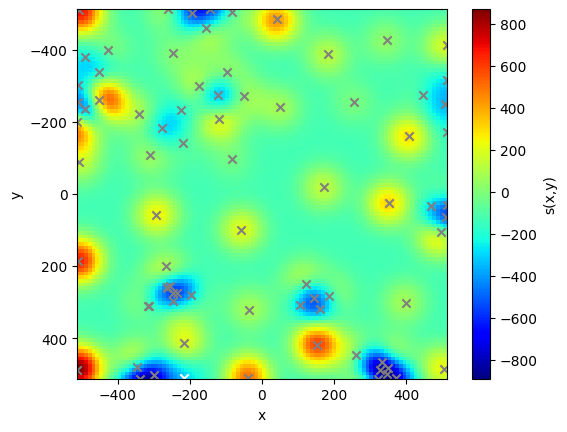

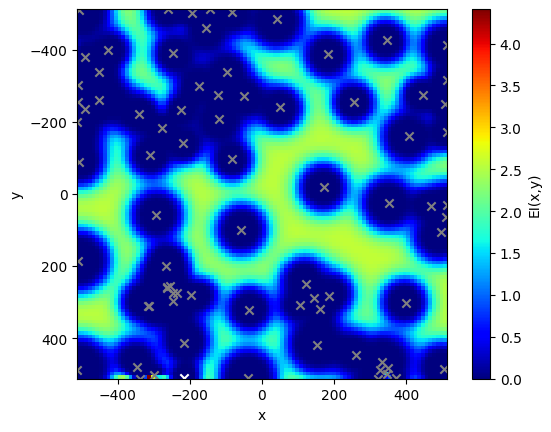

Best value of  -888.6599501905408  at  [346.89252379 498.2673563 ]
Last samples at  [302.0597703  176.00303912]
Best value of  -888.6599501905408  at  [346.89252379 498.2673563 ]
Last samples at  [228.31123059 128.21649386]
Best value of  -888.6599501905408  at  [346.89252379 498.2673563 ]
Last samples at  [381.364014   179.17240925]
Best value of  -888.6599501905408  at  [346.89252379 498.2673563 ]
Last samples at  [ 46.50923611 -90.01603672]
Best value of  -888.6599501905408  at  [346.89252379 498.2673563 ]
Last samples at  [87.12290459 99.47772565]
Best value of  -888.6599501905408  at  [346.89252379 498.2673563 ]
Last samples at  [-444.86777514   38.98784652]
Best value of  -888.6599501905408  at  [346.89252379 498.2673563 ]
Last samples at  [-512.           39.80206877]
Best value of  -888.6599501905408  at  [346.89252379 498.2673563 ]
Last samples at  [ 260.60323322 -123.75518119]
Best value of  -888.6599501905408  at  [346.89252379 498.2673563 ]
Last samples at  [-467.12772987  

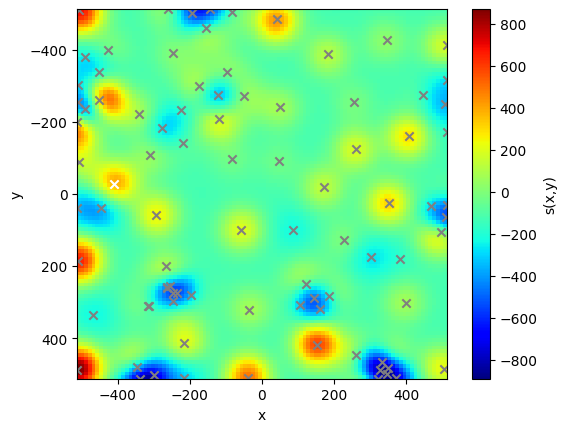

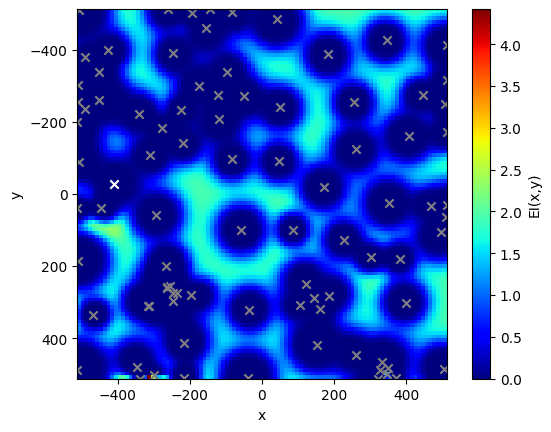

Best value of  -888.6599501905408  at  [346.89252379 498.2673563 ]
Last samples at  [-415.4863882   101.49221881]
Best value of  -888.6599501905408  at  [346.89252379 498.2673563 ]
Last samples at  [-458.70772788   87.93680597]
Best value of  -888.6599501905408  at  [346.89252379 498.2673563 ]
Last samples at  [-380.74424813  144.82523016]
Best value of  -888.6599501905408  at  [346.89252379 498.2673563 ]
Last samples at  [-372.94209712   97.57672474]


/Users/wdasilv/repositories/black-box-opt/.venv/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Best value of  -888.6599501905408  at  [346.89252379 498.2673563 ]
Last samples at  [-412.17705806  181.48565123]
Best value of  -888.6599501905408  at  [346.89252379 498.2673563 ]
Last samples at  [-167.29547449   -2.60646754]
Best value of  -888.6599501905408  at  [346.89252379 498.2673563 ]
Last samples at  [512.         257.27414129]
Best value of  -888.6599501905408  at  [346.89252379 498.2673563 ]
Last samples at  [-341.45368516  162.64543849]
Best value of  -888.6599501905408  at  [346.89252379 498.2673563 ]
Last samples at  [-389.64964871  511.46021568]
Best value of  -888.6599501905408  at  [346.89252379 498.2673563 ]
Last samples at  [-318.05573599  511.65951878]


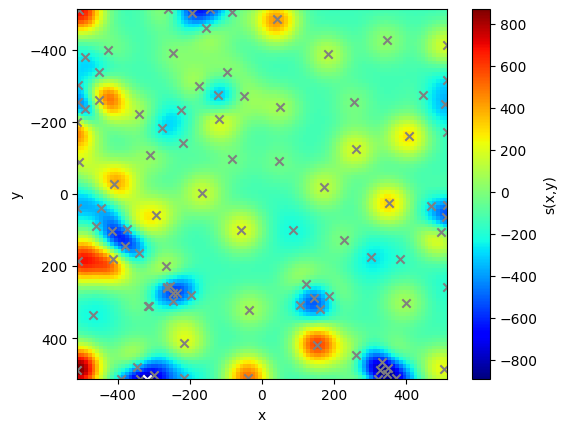

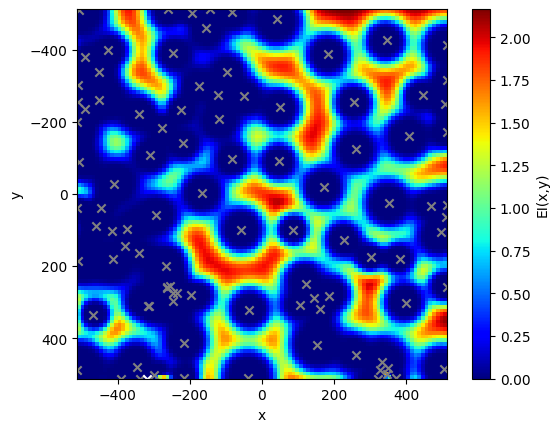

OptimizeResult(x=array([346.89252379, 498.2673563 ]), fx=-888.6599501905408, nit=98, nfev=100, samples=array([[-256.        ,  256.        ],
       [ 256.        , -256.        ],
       [-214.8084474 ,  412.51935667],
       [ 345.34282398, -427.19047113],
       [-262.74749865,  258.77725455],
       [-266.16299898,  199.54339073],
       [-247.5629205 ,  275.87553024],
       [-196.40933051,  280.20710885],
       [-316.37203251,  309.38015404],
       [-247.38191156,  295.950619  ],
       [ -84.10933862,  -95.58448642],
       [-245.13702014, -391.1718211 ],
       [-507.79643221,  -89.69043965],
       [ 143.47069093,  287.50089992],
       [ 106.74833525,  308.91257596],
       [ 122.52639007,  249.51249396],
       [ 159.75567095,  318.34677177],
       [ 186.97066957,  282.56999101],
       [-236.09476552,  274.38696913],
       [ 153.37140814,  418.73044743],
       [ 510.82721116,   63.59431671],
       [ 497.07609238,  106.51732164],
       [ 512.        ,   30.49684243],


In [6]:
import blackboxopt.optimize as bbopt
from blackboxopt.gp import GaussianProcess, expected_improvement
from blackboxopt.rbf import RbfModel
from sklearn.gaussian_process.kernels import RBF as GPkernelRBF

savefig=False

def callback_rbf(out: bbopt.OptimizeResult):

    print("Best value of ", out.fx, " at ", out.x)
    print("Last samples at ", out.samples[out.nfev-1])

    if out.nfev % 10 == 0 or savefig:
        model = RbfModel()
        model.reserve(0, n)
        model.update(out.samples[0:out.nfev,:], out.fsamples[0:out.nfev])

        S = np.zeros((ny,nx))
        for i in range(ny):
            S[i, :], _ = model(XY[i, :])

        plot_2d(out.samples[0:out.nfev,0], out.samples[0:out.nfev,1], S, bounds, "s(x,y)")
        if savefig:
            plt.savefig("surrogate_{:03d}.png".format(out.nfev))
        if out.nfev % 10 == 0:
            plt.show()
        else:
            plt.close()

def callback_gp(out: bbopt.OptimizeResult):

    print("Best value of ", out.fx, " at ", out.x)
    print("Last samples at ", out.samples[out.nfev-1])

    if out.nfev % 10 == 0 or savefig:
        model = GaussianProcess(GPkernelRBF(), n_restarts_optimizer=20, normalize_y=True)
        model.fit(out.samples[0:out.nfev,:], out.fsamples[0:out.nfev])

        Mean = np.zeros((ny,nx))
        Std = np.zeros((ny,nx))
        EI = np.zeros((ny,nx))
        for i in range(ny):
            Mean[i, :], Std[i, :] = model(XY[i, :])
            EI[i, :] = expected_improvement(Mean[i, :], Std[i, :], out.fx)

        plot_2d(out.samples[0:out.nfev,0], out.samples[0:out.nfev,1], Mean, bounds, "s(x,y)")
        if savefig:
            plt.savefig("surrogate_{:03d}.png".format(out.nfev))
        if out.nfev % 10 == 0:
            plt.show()
        else:
            plt.close()

        plot_2d(out.samples[0:out.nfev,0], out.samples[0:out.nfev,1], EI, bounds, "EI(x,y)")
        if savefig:
            plt.savefig("EI_{:03d}.png".format(out.nfev))
        if out.nfev % 10 == 0:
            plt.show()
        else:
            plt.close()

np.random.seed(3)

callback = {"bayesian_optimization":callback_gp, "cptv":callback_rbf, "target_value_optimization":callback_rbf, "multistart_stochastic_response_surface":callback_rbf}
methodstr = "bayesian_optimization"

getattr(bbopt, methodstr)(lambda x: [objf[funcstr](xi) for xi in x], bounds=bounds, maxeval=100, callback=callback[methodstr])